# Convolution Neural Network

- Reference
  - [Convolutional Neural Network](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)
  - [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
  - [A Comprehensive Guide to CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


## Introduction

![image.png](./img/01.png)

### Single Layer Neural Network

- A single-layer neural network, also known as a `perceptron`, is one of the simplest forms of artificial neural networks.
  - It consists of only one layer of artificial neurons, also called `nodes` or `units`, arranged in a single layer.
  - Despite its simplicity, a single-layer neural network can be powerful for solving certain types of problems, particularly those that involve linearly separable data.
- In a single-layer neural network, each neuron receives input signals, applies weights to those inputs, sums them up, and then applies an activation function to produce an output.
  - The output is typically used to make predictions or classify input data into different categories.

![image.png](./img/02.png)


## Activation Function:

An activation function is a mathematical function applied to the output of each neuron in a neural network. It introduces **non-linearity** to the network, enabling it to **learn complex patterns and relationships in the data**.

### Purpose

1. **Non-Linearity**: Activation functions introduce non-linear transformations to the input, allowing neural networks to model non-linear relationships in data. Without activation functions, even a multi-layer neural network would behave like a single-layer perceptron, unable to capture complex patterns.
2. **Normalization**: They normalize the output of neurons, ensuring that the **values fall within a certain range**. This can aid in stabilizing and speeding up the training process.
3. **Feature Learning**: Activation functions help in learning useful features from the input data, enabling the network to represent and understand the underlying structure of the data.

### Common Activation Functions

1. **ReLU (Rectified Linear Unit)**:
   1. $f(x) = max(0,x)$
   2. ReLU sets all negative values to zero, introducing sparsity and accelerating the learning process.
   3. Widely used due to its simplicity and effectiveness.
2. **Sigmoid**
   1. $f(x) = \frac{1}{1+e^{-x}}$
   2. **S-shaped** curve squashes the output between 0 and 1, suitable for binary `classification` tasks.
   3. However, it suffers from `vanishing gradient problems`.
3. **Tanh (Hyperbolic Tangent)**
   1. $f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$
   2. Similar to the sigmoid function but maps the output between -1 and 1, addressing the `vanishing gradient problem` to some extent.
4. `Softmax`

   1. Used in the output layer for **multi-class classification** tasks.
   2. It converts the raw scores into probabilities, ensuring that the sum of probabilities across all classes equals one.

   ![image.png](./img/03.png)


## Hidden Layer

In a neural network, the hidden layer is a layer **between the input and output layers**. It consists of neurons that perform computations on the input data using `weights` and `biases`, transforming the input into a representation that the output layer can use to make predictions.

### Types of Hidden Layers

1. **Fully Connected (Dense) Layer:** Every neuron in a fully connected layer is connected to every neuron in the previous and next layers, forming a dense matrix of connections.

   ![image.png](./img/04.png)

2. **[Convolutional Layer](https://gisyaliny.github.io/notes/Deep-Learning/Convolutional-Neural-Networks/):** Used primarily in convolutional neural networks (CNNs) for processing grid-like data such as images. Convolutional layers apply filters to input data, extracting spatial hierarchies of features.

   ![image.png](./img/05.png)

3. **Recurrent Layer:** Used in `recurrent neural networks (RNNs)` for processing **sequential data** such as time series or text. Recurrent layers have connections that form cycles, allowing them to retain information over time.

   ![image.png](./img/06.png)


## Example of MNIST Digits

![image.png](./img/07.png)


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
# Define the model
model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    # layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
750/750 [==============================] - 10s 6ms/step - loss: 0.1591 - accuracy: 0.9513 - val_loss: 0.0605 - val_accuracy: 0.9825
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9890
Test accuracy: 0.9890000224113464


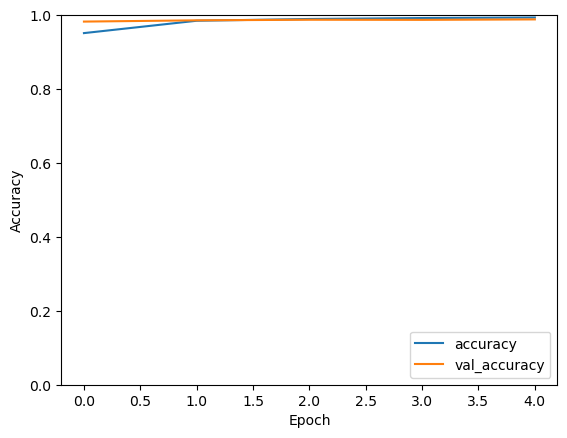

In [5]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 112ms/step


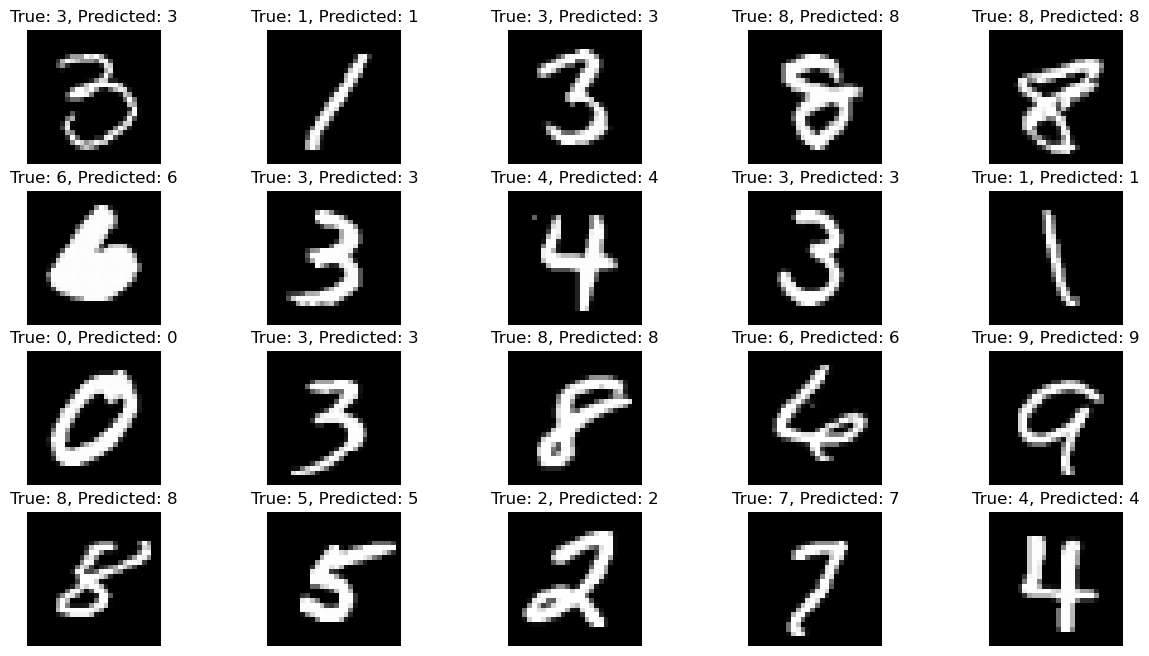

In [6]:
# Randomly pick 10 test images
random_indices = np.random.choice(len(test_images), size=20, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

# Predict labels for the random test images
predictions = model.predict(random_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their true and predicted labels
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(random_test_labels[i])}, Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

![image.png](./img/08.png)


## Convolutional Neural Network (CNN)

- Introduction

  - Convolutional Neural Networks (CNNs) are a class of deep learning neural networks, most commonly applied to analyzing visual imagery.
  - CNNs are particularly effective in tasks such as `image classification`, `object detection`, and `image segmentation`.
  - They are inspired by the organization and functioning of the human visual system, with layers of neurons that progressively extract higher-level features from raw pixel values.

  ![image.png](./img/09.png)

### Key Components

1. Convolutional Layers

   1. The `convolutional filters` (also known as `kernels`) are learned during the training process.
   2. Initially, these filters are randomly initialized, and then they are updated iteratively during training through a process called `backpropagation`.

   ![image-5.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1VJDP6qDY9-ExTuQVEOlVg.gif)

2. Pooling Layers

   ![image.png](./img/10.png)

3. Flatten Layer

   ![image.png](./img/11.png)

- Convolutional Layers usually produce more channels (e.g. `U-Net` or `RestNet`)

  - However, in networks like VGG or AlexNet, the number of channels typically remains constant or decreases as the spatial dimensions of the feature maps increase.
  - The spatial dimensions of feature maps can change due to

    1.  **Stride:** The stride determines the step size at which the convolutional filter slides over the input image or the preceding layer's feature map.
        1.  A larger stride results in a reduction in the spatial dimensions of the feature map, while a smaller stride preserves more spatial information.
    2.  **Padding**: Padding refers to the addition of extra pixels around the input image or feature map.
        1.  It can be used to control the **spatial dimensions of the feature map** after convolution.

    ![image.png](https://miro.medium.com/v2/resize:fit:786/format:webp/1*17TNPi4m0pBqOCGrXzU27w.gif)

- Pooling Layer will not change the number of channels


### Example of Rest-Net (Pre-trained Model)

- [Model Detail](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50)

  ![image.png](./img/12.png)


In [7]:
from tensorflow.keras.applications import ResNet50
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 [==============================] - 0s 26ms/step


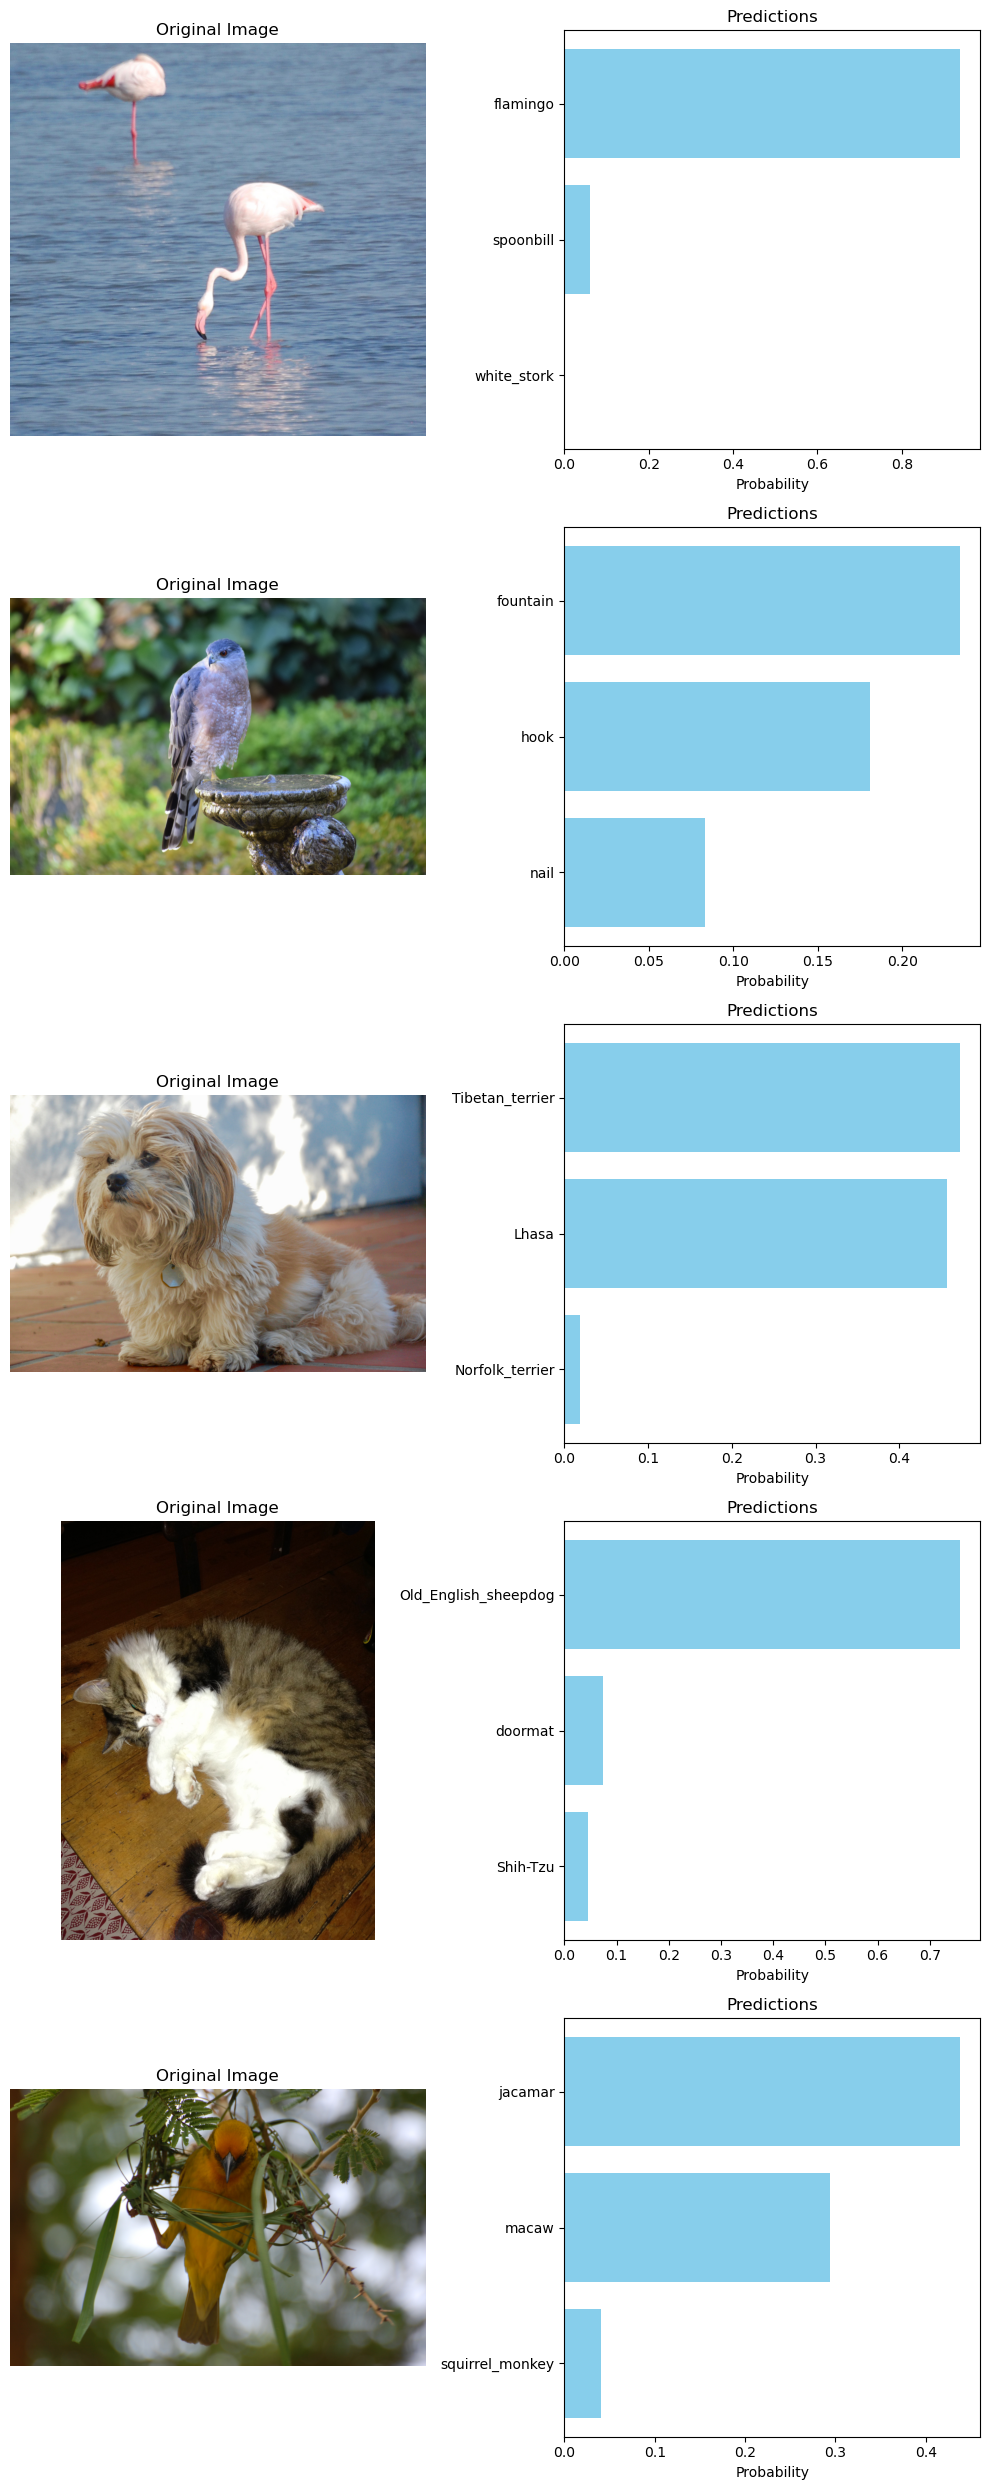

In [11]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Function to preprocess input image
def preprocess_image(img_array):
    img = tf.image.resize(img_array, (224, 224))
    img_array = np.expand_dims(img, axis=0)
    img_array_copy = img_array.copy()  # Create a writable copy of the array
    return preprocess_input(img_array_copy)

# Function to make predictions
def predict(img_array):
    preprocessed_img = preprocess_image(img_array)
    predictions = model.predict(preprocessed_img)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions

# Path to the directory containing images
image_dir = './Images/'

# Get list of image files in the directory
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg') or file.endswith('.png')]

# Plotting images and predictions
num_images = len(image_files)
num_cols = 2  # Two columns: Original Image and Predictions
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

for i, filename in enumerate(image_files):
    image_path = os.path.join(image_dir, filename)
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)

    # Making predictions
    predictions = predict(img_array)

    # Plotting the image
    axes[i, 0].imshow(img)
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Plotting the predictions
    labels = [label for _, label, _ in predictions]
    scores = [score for _, _, score in predictions]
    axes[i, 1].barh(labels, scores, color='skyblue')
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title('Predictions')
    axes[i, 1].set_xlabel('Probability')

plt.tight_layout()
plt.show()

### Regularization In CNN

![image.png](./img/13.png)
